Topic:        Challenge set 1  
Subject:      Explore MTA turnstile data  
Date:         January 14, 2018  
Name:         Audrey Baker  
Worked with:  None

*__Note for instructors__: Although it was requested that we complete this set of challenges using dictionaries, I have chosen to use pandas. My Benson group included someone who is very proficient in pandas, who drove most of our data restructuring. Therefore, I felt that it was important for me to prioritize my practice of pandas, which is new to me.*

*I do see the value in getting more practice in using dictionaries, and I intend to return to these exercises and complete them using dictionaries at a later date. Please do not hesitate to speak with me if you have any questions and/or concerns.*

**Challenge 1.1**

In [348]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from datetime import datetime as dt

%matplotlib inline

In [349]:
def build_dataset(weeks):
    #create template for weekly data url with place held for week code using {}
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    #create empty list to hold multiple weekly dataframes
    dataframes = []
    
    for week in weeks:
        #insert week code into url
        week_url = url.format(week)
        #append dataset to list
        dataframes.append(pd.read_csv(week_url))
        #concatenate datasets in list into one dataset
    return pd.concat(dataframes)
    

#codes for weeks ending 30 Dec 2017, 06 Jan 2018, and 13 Jan 2018
weeks = [171104, 171111, 171118]

mta_use = build_dataset(weeks)

In [350]:
#resetting index to account for non-unique index 
mta_use = mta_use.reset_index().drop('index',1)

In [351]:
#strip extra spaces from column names
mta_use.columns = mta_use.columns.str.strip()

**Challenge 1.2**

In [352]:
#create date_time field 
mta_use['DATE_TIME'] = pd.to_datetime(mta_use.DATE + ' ' + mta_use.TIME, format='%m/%d/%Y %H:%M:%S')

In [353]:
mta_use.head(100)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/28/2017,00:00:00,REGULAR,6383129,2159840,2017-10-28 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/28/2017,04:00:00,REGULAR,6383157,2159846,2017-10-28 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/28/2017,08:00:00,REGULAR,6383178,2159888,2017-10-28 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/28/2017,12:00:00,REGULAR,6383270,2159965,2017-10-28 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/28/2017,16:00:00,REGULAR,6383502,2160026,2017-10-28 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/28/2017,20:00:00,REGULAR,6383802,2160066,2017-10-28 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/29/2017,00:00:00,REGULAR,6383948,2160094,2017-10-29 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/29/2017,04:00:00,REGULAR,6383972,2160101,2017-10-29 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/29/2017,08:00:00,REGULAR,6383987,2160125,2017-10-29 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/29/2017,12:00:00,REGULAR,6384042,2160188,2017-10-29 12:00:00


In [354]:
#drop duplicate entry records caused by recover audits
mta_use.sort_values(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE_TIME'], inplace = True, ascending = False)
mta_use.drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE_TIME'], inplace = True)
mta_use.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
597028,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,11/17/2017,20:00:00,REGULAR,2795197,383339,2017-11-17 20:00:00
597027,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,11/17/2017,16:00:00,REGULAR,2794956,383335,2017-11-17 16:00:00
597026,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,11/17/2017,12:00:00,REGULAR,2794656,383335,2017-11-17 12:00:00
597025,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,11/17/2017,08:00:00,REGULAR,2794284,383333,2017-11-17 08:00:00
597024,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,11/17/2017,04:00:00,REGULAR,2794142,383331,2017-11-17 04:00:00


In [355]:
#drop unnecessary columns
mta_use = mta_use.drop(['DIVISION', 'DESC', 'EXITS'], axis = 1, errors = 'ignore')
mta_use.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,DATE_TIME
597028,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,11/17/2017,20:00:00,2795197,2017-11-17 20:00:00
597027,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,11/17/2017,16:00:00,2794956,2017-11-17 16:00:00
597026,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,11/17/2017,12:00:00,2794656,2017-11-17 12:00:00
597025,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,11/17/2017,08:00:00,2794284,2017-11-17 08:00:00
597024,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,11/17/2017,04:00:00,2794142,2017-11-17 04:00:00


**Challenge 1.3**

In [358]:
# take one measure of entries per day
mta_use_daily = mta_use\
                .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME','DATE'])\
                .ENTRIES.first()\
                .reset_index()


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,10/28/2017,6383802
1,A002,R051,02-00-00,59 ST,NQR456W,10/29/2017,6384302
2,A002,R051,02-00-00,59 ST,NQR456W,10/30/2017,6385801
3,A002,R051,02-00-00,59 ST,NQR456W,10/31/2017,6387847
4,A002,R051,02-00-00,59 ST,NQR456W,11/01/2017,6390085
5,A002,R051,02-00-00,59 ST,NQR456W,11/02/2017,6391753
6,A002,R051,02-00-00,59 ST,NQR456W,11/03/2017,6393367
7,A002,R051,02-00-00,59 ST,NQR456W,11/04/2017,6394374
8,A002,R051,02-00-00,59 ST,NQR456W,11/05/2017,6395378
9,A002,R051,02-00-00,59 ST,NQR456W,11/06/2017,6396872


In [380]:
#add column with previous entries
mta_use_daily[['PREV_DATE','PREV_ENTRIES']] = (mta_use_daily
                                      .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME'])['DATE', 'ENTRIES']
                                      .transform(lambda grp: grp.shift(1)))

In [392]:
#drop rows for first date
mta_use_daily.dropna(subset = ['PREV_DATE'], axis=0, inplace = True)
mta_use_daily.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
2,A002,R051,02-00-00,59 ST,NQR456W,10/30/2017,6385801,10/29/2017,6384302.0
3,A002,R051,02-00-00,59 ST,NQR456W,10/31/2017,6387847,10/30/2017,6385801.0
4,A002,R051,02-00-00,59 ST,NQR456W,11/01/2017,6390085,10/31/2017,6387847.0
5,A002,R051,02-00-00,59 ST,NQR456W,11/02/2017,6391753,11/01/2017,6390085.0
6,A002,R051,02-00-00,59 ST,NQR456W,11/03/2017,6393367,11/02/2017,6391753.0


In [394]:
def get_daily_counts(row, max_counter):
    counter = row['ENTRIES'] - row['PREV_ENTRIES']
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row['ENTRIES'], row['PREV_ENTRIES'], row['C/A'], row['UNIT'],
              row['SCP'], row['STATION'])
        return 0
    return counter

#If counter is > 15K, then the counter might have been reset.
#This assumes the maximum flow is 10 people per minute through one turnstile.
mta_use_daily['DAILY_ENTRIES'] = mta_use_daily.apply(get_daily_counts, axis= 1, max_counter=15000)

319 153906.0 A060 R001 00-00-02 WHITEHALL S-FRY
1090546708 4319312.0 D016 R397 00-00-01 86 ST
67109439 5975290.0 N034 R334 01-00-02 CATHEDRAL PKWY
966 111002.0 N092 R029 03-03-01 CHAMBERS ST
236 22629.0 N112A R284 01-06-00 CLINTON-WASH AV
43 205799.0 N181 R357 00-06-00 AQUEDUCT N.COND
330 63136.0 N196 R285 00-00-00 FAR ROCKAWAY
68 300671.0 N212 R253 01-06-02 174-175 STS
975 12654250.0 N329 R201 00-03-01 WOODHAVEN BLVD
81 28389.0 N340 R115 00-00-04 169 ST
786432 0.0 N422 R318 00-05-00 FULTON ST
872102255 280892.0 N539A R288 00-03-01 7 AV
459412 35290.0 N550 R242 01-06-00 18 AV
164 48732.0 PTH01 R549 00-00-00 NEWARK HW BMEBE
562 553773.0 PTH03 R552 00-01-04 JOURNAL SQUARE
753 934889.0 PTH04 R551 00-04-01 GROVE STREET
1031 476969.0 PTH04 R551 00-04-03 GROVE STREET
0 310592.0 PTH05 R543 00-01-07 EXCHANGE PLACE
840 15966.0 PTH11 R545 00-00-03 14TH STREET
15 25549.0 PTH11 R545 00-04-05 14TH STREET
94 295766.0 PTH16 R550 01-00-07 LACKAWANNA
1556 446640.0 PTH16 R550 01-01-08 LACKAWANNA
40 2273

**Challenge 1.4**

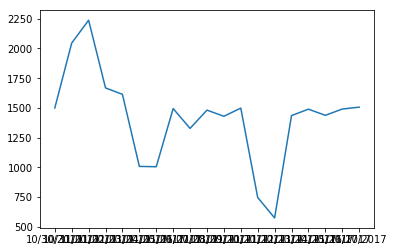

In [397]:
turnstile_mask = ((mta_use_daily['C/A'] == 'A002') &
                  (mta_use_daily['UNIT'] == 'R051') &
                  (mta_use_daily['SCP'] == '02-00-00') &
                  (mta_use_daily['STATION'] == '59 ST') &
                  (mta_use_daily['LINENAME'] == 'NQR456W'))

plt.plot(mta_use_daily[turnstile_mask]['DATE'], mta_use_daily[turnstile_mask]['DAILY_ENTRIES']);



**Challenge 1.5**

In [404]:
control_area_daily = mta_use_daily\
                    .groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'DATE'])\
                    .DAILY_ENTRIES.sum()\
                    .reset_index()
            
control_area_daily.head()

,C/A,UNIT,STATION,LINENAME,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,NQR456W,10/30/2017,13207.0
1,A002,R051,59 ST,NQR456W,10/31/2017,13925.0
2,A002,R051,59 ST,NQR456W,11/01/2017,13958.0
3,A002,R051,59 ST,NQR456W,11/02/2017,14099.0
4,A002,R051,59 ST,NQR456W,11/03/2017,14620.0


**Challenge 1.6**

In [402]:
station_daily = mta_use_daily.groupby(['STATION', 'LINENAME', 'DATE']).DAILY_ENTRIES.sum().reset_index()
station_daily.head()

,STATION,LINENAME,DATE,DAILY_ENTRIES
0,1 AV,L,10/30/2017,20563.0
1,1 AV,L,10/31/2017,22315.0
2,1 AV,L,11/01/2017,22778.0
3,1 AV,L,11/02/2017,22625.0
4,1 AV,L,11/03/2017,23708.0


**Challenge 1.7**

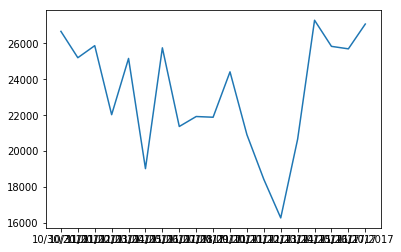

In [419]:
station_mask = ((station_daily['STATION'] == 'ATL AV-BARCLAY') &
                (station_daily['LINENAME'] == 'BDNQR2345'))

plt.plot(station_daily[station_mask]['DATE']\
         ,station_daily[station_mask]['DAILY_ENTRIES']);



**Challenge 1.8**

*I did not understand what this was asking me to do.*

**Challenge 1.9**

In [429]:
station_total = station_daily\
                .groupby(['STATION', 'LINENAME'])\
                .DAILY_ENTRIES.sum()\
                .reset_index()\
                .rename(columns = {'DAILY_ENTRIES':'TOTAL_ENTRIES'})\
                .sort_values(by = ['TOTAL_ENTRIES'], ascending = False)

                
station_total.head(5)

,STATION,LINENAME,TOTAL_ENTRIES
311,GRD CNTRL-42 ST,4567S,2647909.0
89,34 ST-HERALD SQ,BDFMNQRW,2284546.0
101,42 ST-PORT AUTH,ACENQRS1237W,1569447.0
93,34 ST-PENN STA,ACE,1453116.0
28,14 ST-UNION SQ,LNQR456W,1410943.0


**Challenge 1.10**

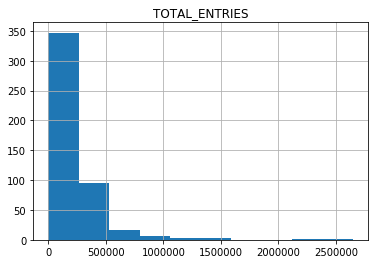

In [431]:
station_total.hist();